# **Web scraping Music data using Python**
## Python Project for Beginners

Web scraping is an automated process of gathering information from websites by fetching their HTML content and extracting desired data. It enables users to collect data from various internet sources for analysis, research, or other purposes. The extracted data can be stored in a spreadsheet or database, allowing for further examination and utilization. During web scraping, web pages are fetched and their content is parsed and searched to locate the necessary information. The extracted data may undergo rearrangement or reformatting as needed. To automate this process, web scrapers, such as tools or scripts, are used to extract specific data elements from web pages automatically. In summary, web scraping involves fetching web pages, extracting desired data, and using it for analysis, storage, or integration with other systems. It offers a time-saving alternative to manual data collection methods.

- We will be using the Music to Scrape website for our web scraping task. This website is a fictional website about Music and streaming songs intentionally designed to facilitate web scraping practice for beginners and allow developers to validate their scraping techniques. You can access the website at: Music to Scrape (Apis-to-scrape?).

To accomplish this task, we will utilize various tools and technologies such as Python, Requests, BeautifulSoup, and Pandas. 
- *Python* is a versatile programming language that provides excellent support for web scraping. 
- *Requests* is a Python library that simplifies making HTTP requests to retrieve webpage data. 
- *BeautifulSoup* is a powerful library for parsing and navigating HTML or XML documents, which will help us extract specific information from the website. 
- Lastly, *Pandas* is a popular data manipulation library in Python that will aid in organizing and analyzing the scraped data from the Books to Scrape website.

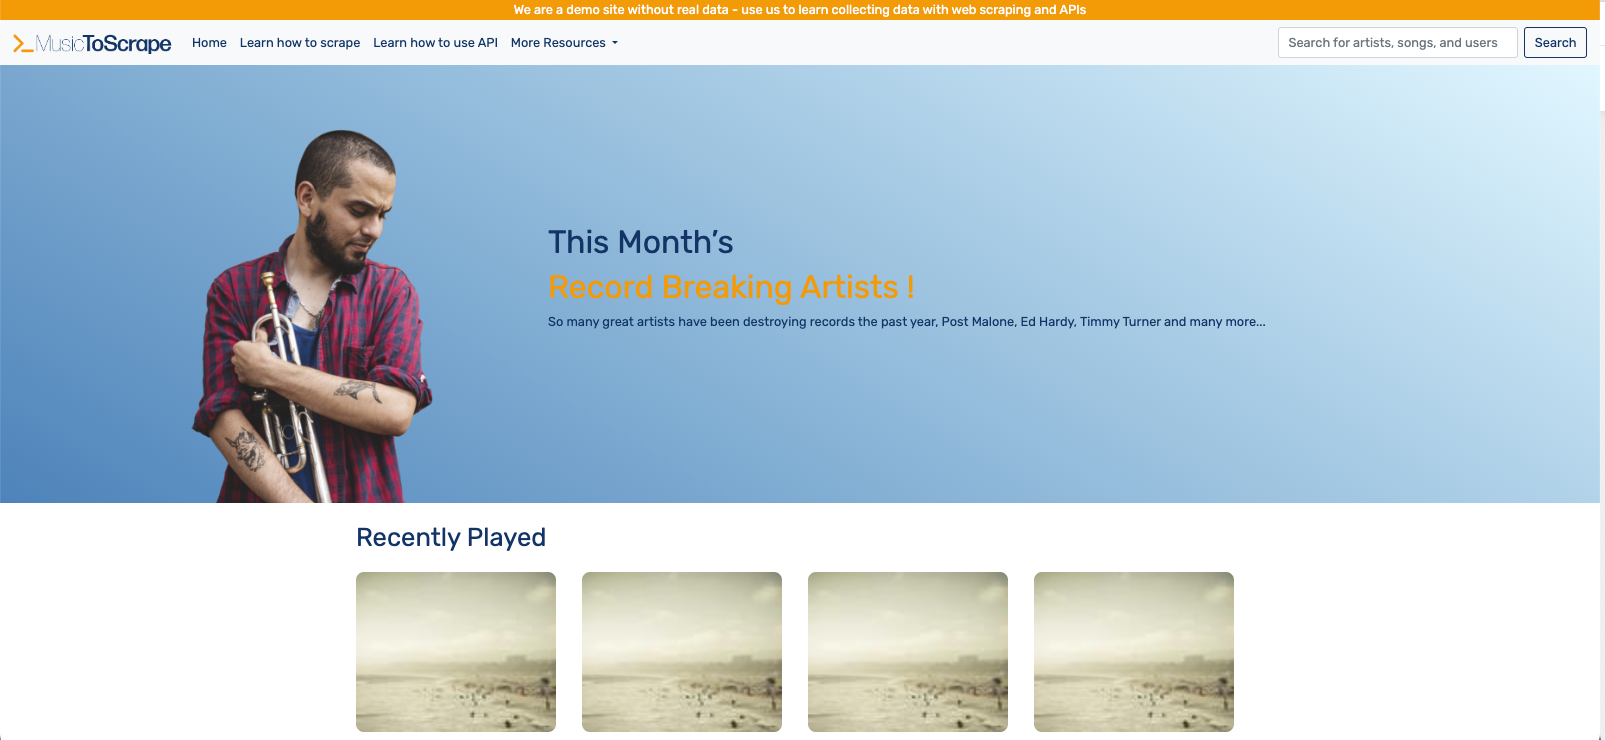

### **Outline**:
We will extract the following information from this website:
- Home Page Information: the title, subtitle, banner text, song urls, artist urls, user urls and the the Top 15 weekly.
- User Information: username, country, age and recently played
- Artist Information: name, location, number of tracks, number of playlists and the top 10 songs all time
- Song Information: title, artist, year, number of plays, danceability, duration, key signature, tempo and time signature. 
- Search Engine Information

Once the information is collected, we will store it in Pandas DataFrames and then convert it into a CSV files.

#### **To begin, we will import the necessary libraries and dependencies**

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import re

### **Main Page**
**Download the webpage using requests**

In [ ]:
URL = 'http://127.0.0.1:8080/' # change into final actual url
response = requests.get(URL)

In [ ]:
page_contents = response.text

In [ ]:
#Creating a file and loading the page contents in it.
with open('Musicwebpage.html','w') as f:
    f.write(page_contents)

**Using Beautiful Soup to parse the HTML and extract the desired information**



In [ ]:
from bs4 import BeautifulSoup
doc = BeautifulSoup(page_contents,'html.parser')

**Grabbing Title, Subtitle & Description from the Header**

In [ ]:
# Title
title = soup.find('h1').get_text().replace('â€™', "'") # remove those tokens from Month's output 

# Subtitle
subtitle = soup.find('h1', class_='ms_color').get_text()

# Banner text with adjusted white space
bannertext = soup.find('p', class_='banner_text_par').get_text()
bannertext = re.sub('\s+', ' ', bannertext).strip()

# Create a dictionary with the information
header = {
    'title': title,
    'subtitle': subtitle,
    'bannertext': bannertext
}

# Return the header
header

*header* will give you the title, the subtitle and the description displated on the main page like the image shown below.

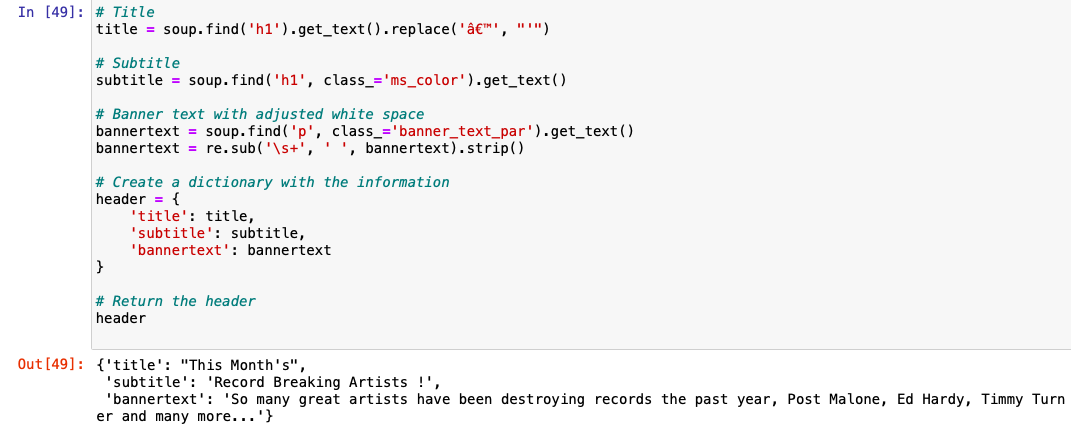

**Using the Inspect Element feature to identify and extract the location of the required information**

The header section retrieves the title and subtitle from the text within the h1 tag and the corresponding class 'ms_color'. Additionally, it retrieves the bannertext from a p-tag with the class 'banner_text_par'. Furthermore, the sentences within the bannertext are combined using re.sub to create a single cohesive sentence.

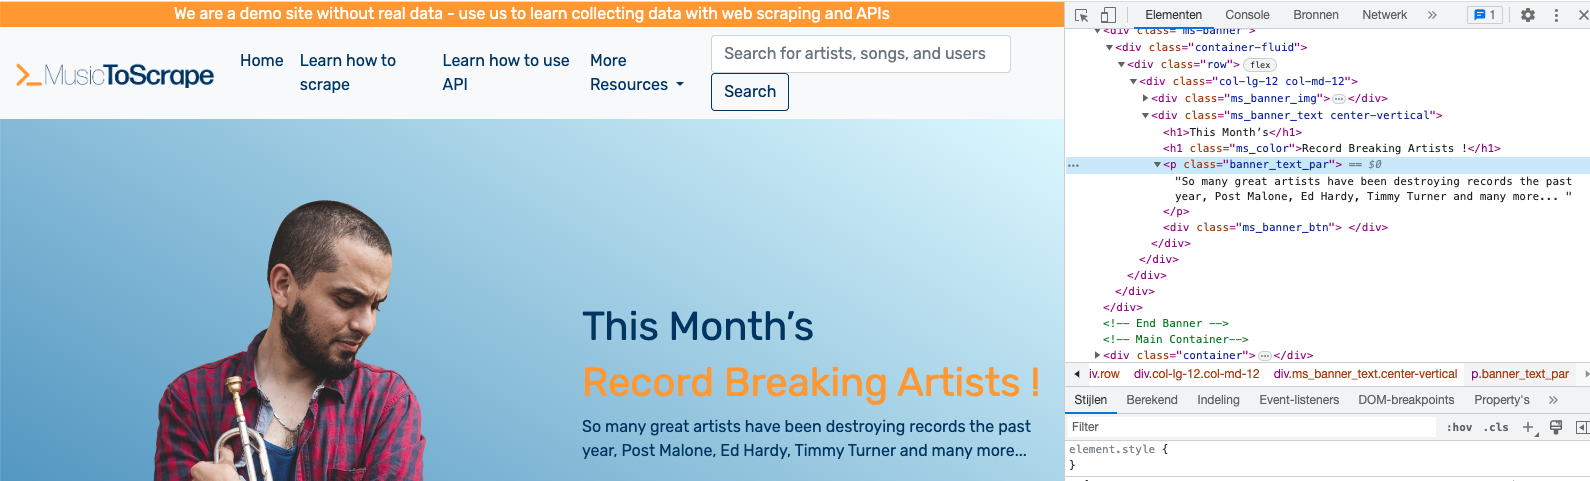

**Retrieve Recently Played & Song Information**

This module aims to scrape the recently played tracks, providing the ...
First, we are going to collect the urls of the different songs. In this section, we will create a helper function called get_song_urls to retrieve the links for each song.


In [ ]:
def get_song_urls():
    url = 'http://127.0.0.1:8080/'
    header = {'User-agent': 'Mozilla/5.0'}
    res = requests.get(url, headers=header)
    res.encoding = res.apparent_encoding
    soup = BeautifulSoup(res.text, 'html.parser')

    song_urls = []

    # Retrieve URLs from class "swiper-slide"
    for item in soup.find_all(class_="swiper-slide"):
        urls = item.find_all('a')
        for url in urls:
            href = url["href"]
            if href.startswith("song?song-id="):
                full_url = f'http://127.0.0.1:8080/{href}'
                song_urls.append(full_url)

    # Retrieve URLs from class "list-group list-group-flush"
    for item in soup.find_all(class_="list-group list-group-flush"):
        urls = item.find_all('a')
        for url in urls:
            href = url["href"]
            if href.startswith("song?song-id="):
                full_url = f'http://127.0.0.1:8080/{href}'
                song_urls.append(full_url)

    return song_urls

song_urls = get_song_urls()
song_urls

*song_urls* will give you urls of the songs like the image shown below.

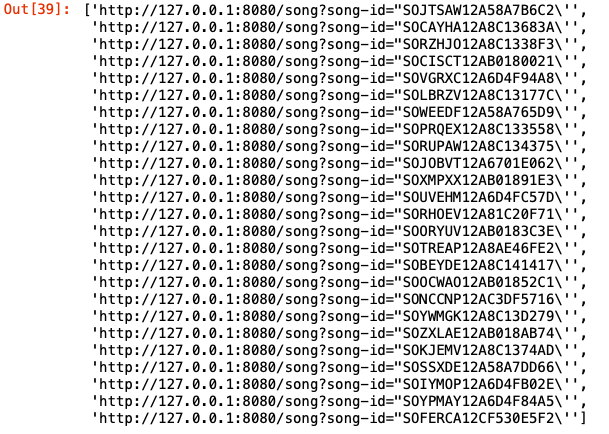

From the songs, we want to grab the following information:
- Title
- Artist
- Year
- Number of Plays
- Danceability
- Duration
- Key Signature
- Tempo
- Time Signature

We are going to use the song-urls we have retrieved above. 

Below you can see the song information page. We will not focus on the song statistics.

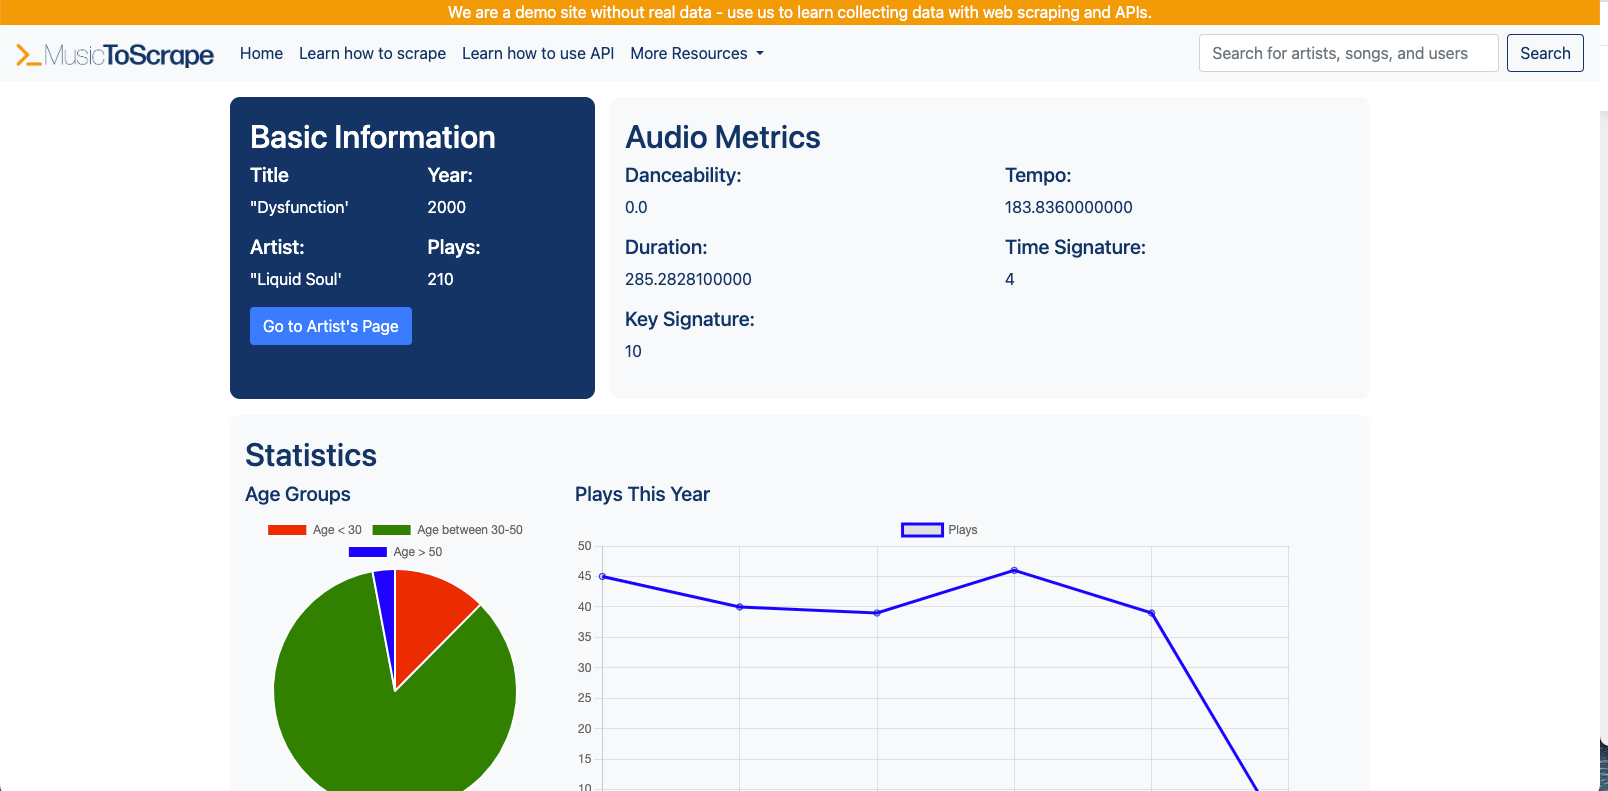

In [ ]:
def scrape_song_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    element = soup.find(class_='song_basic_information_card')
    if element is not None:
        info = element.get_text()
        info_lines = info.split('\n')

        song_data = {
            "title": None,
            "artist": None,
            "year": None,
            "plays": None,
        }

        for i in range(len(info_lines)):
            line = info_lines[i]
            if line == "Title":
                song_data["title"] = info_lines[i + 1].strip()
            elif line == "Artist:":
                song_data["artist"] = info_lines[i + 1].strip()
            elif line.startswith("Year:"):
                song_data["year"] = info_lines[i + 1].strip()
            elif line.startswith("Plays:"):
                song_data["plays"] = info_lines[i + 1].strip()

        return song_data
    else:
        print("Element not found.")
        return None


def scrape_song_metrics(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    metrics_element = soup.find(class_='col-lg-8 album_single_text song_audio_metrics')
    if metrics_element is not None:
        metrics_info = metrics_element.get_text()
        metrics_lines = metrics_info.split('\n')

        song_metrics = {
            "danceability": None,
            "duration": None,
            "key_signature": None,
            "tempo": None,
            "time_signature": None
        }

        for i in range(len(metrics_lines)):
            line = metrics_lines[i]
            if line == "Danceability:":
                song_metrics["danceability"] = metrics_lines[i + 1].strip()
            elif line == "Duration:":
                song_metrics["duration"] = metrics_lines[i + 1].strip()
            elif line == "Key Signature:":
                song_metrics["key_signature"] = metrics_lines[i + 1].strip()
            elif line == "Tempo:":
                song_metrics["tempo"] = metrics_lines[i + 1].strip()
            elif line == "Time Signature:":
                song_metrics["time_signature"] = metrics_lines[i + 1].strip()

        return song_metrics
    else:
        print("Element not found.")
        return None


song_urls = get_song_urls()
all_song_data = []

for url in song_urls:
    song_data = scrape_song_data(url)
    song_metrics = scrape_song_metrics(url)

    combined_song_data = {
        "title": song_data["title"],
        "artist": song_data["artist"],
        "year": song_data["year"],
        "plays": song_data["plays"],
        "danceability": song_metrics["danceability"],
        "duration": song_metrics["duration"],
        "key_signature": song_metrics["key_signature"],
        "tempo": song_metrics["tempo"],
        "time_signature": song_metrics["time_signature"]
    }

    all_song_data.append(combined_song_data)

all_song_data


*all_song_data* will give you the song information as shown below.

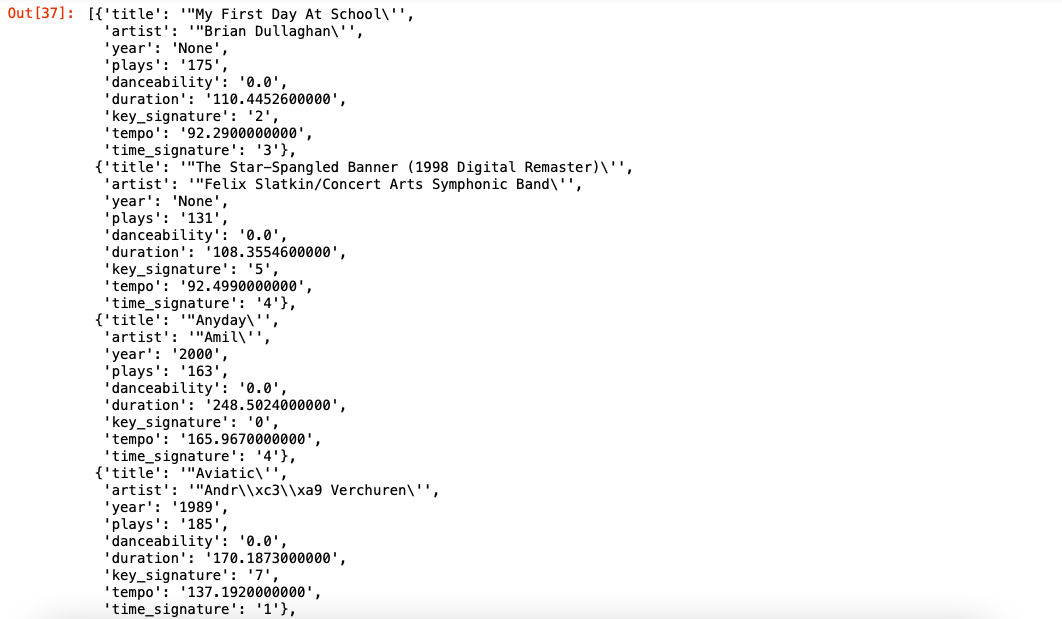

Now, we will store the song information in a Pandas DataFrame and export it as a CSV file. We use the code below.

In [ ]:
# Create DataFrame from all_song_data
df = pd.DataFrame(all_song_data)

# Save DataFrame as CSV
df.to_csv('song_data.csv', index=False)

**Retrieve Top 15 Weekly Tracks**

This module aims to scrape the top 15 weekly tracks, providing the artist name, song name, and position within the top 15 list.

In [ ]:
elements = soup.find_all(class_="center-vertical center-text")

# Store the data in the top15_data dictionary
top15_data = []
artists = []
songs = []

# Loop over each element and split the text into artist and song
for element in elements:
    text = element.get_text()
    lines = text.splitlines()
    if len(lines) >= 2:
        artist = lines[1]
        song = lines[2]
        artists.append(artist)
        songs.append(song)

elements2 = soup.find_all(class_='center-vertical text-center')
rankings = [element.find('h2').get_text() for element in elements2]

# Loop over the artists and songs simultaneously and create a dictionary for each pair
for artist, song, ranking in zip(artists, songs, rankings):
    data = {
        "artist": artist,
        "song": song,
        "ranking": ranking
    }
    top15_data.append(data)

top15_data

*top15_data* will give you the artist, songname and ranking in the top 15 weekly played like the image shown below.

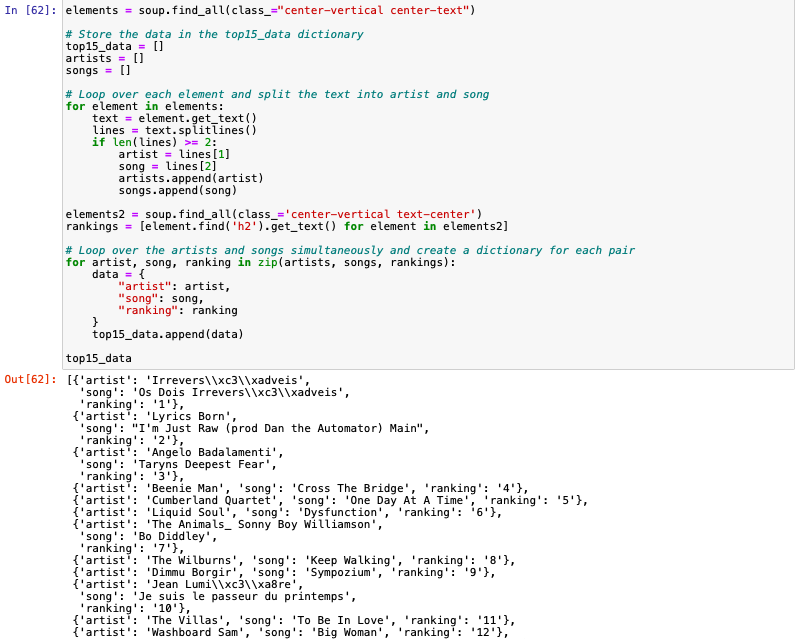

Now, we will store the weekly top 15 information in a Pandas DataFrame and export it as a CSV file. We use the code below.

In [ ]:
# Create DataFrame from top15_data
df = pd.DataFrame(top15_data)

# Save the top 15 data as a CSV file
df.to_csv('top15_data.csv', index=False)

**Retrieve Featured Artists**

First, we are going to collect the urls of the different artists. In this section, we will create a helper function called get_artist_urls to retrieve the links for each artist.

In [ ]:
def get_artist_urls():
    url = 'http://127.0.0.1:8080/'
    header = {'User-agent': 'Mozilla/5.0'}
    res = requests.get(url, headers=header)
    res.encoding = res.apparent_encoding
    soup = BeautifulSoup(res.text, 'html.parser')

    artist_urls = []

    for item in soup.find_all(class_="swiper-slide"):
        urls = item.find_all('a')
        for url in urls:
            href = url["href"]
            if href.startswith("artist?artist-id="):
                full_url = f'http://127.0.0.1:8080/{href}'
                artist_urls.append(full_url)

    return artist_urls

artist_urls = get_artist_urls()
artist_urls

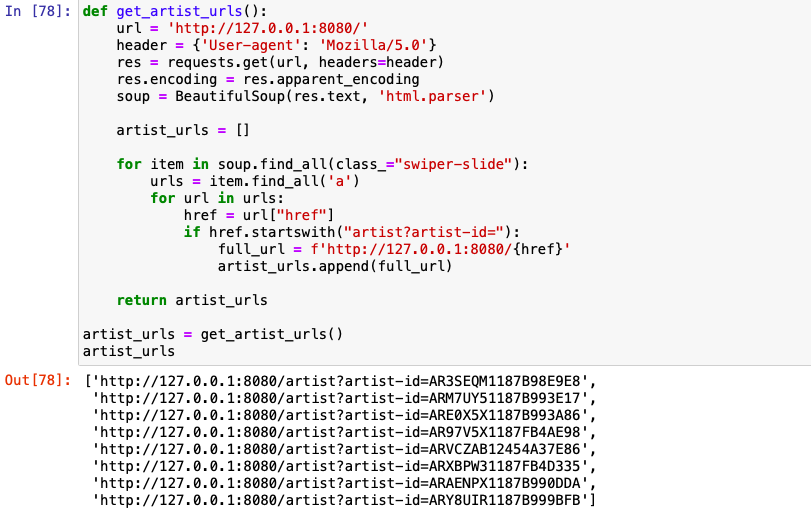

In this section, we will create a helper function called scrape_artist_dara to retrieve the data for each artist.

In [ ]:
def scrape_artist_data(url):
    header = {'User-agent': 'Mozilla/5.0'}
    res = requests.get(url, headers=header)
    res.encoding = res.apparent_encoding
    soup = BeautifulSoup(res.text, 'html.parser')

    name = soup.find('h2').get_text()

    artist_info = soup.find(class_="about_artist").get_text()
    artist_parts = artist_info.split()

    location = soup.find('h5', text='Location:').find_next_sibling('p').text
    number_of_tracks = soup.find('h5', text='Number of tracks:').find_next_sibling('p').text
    number_of_playlists = soup.find('h5', text='Number of Playlists:').find_next_sibling('p').text

    artist_data = {
        "name": name,
        "location": location,
        "number_of_tracks": number_of_tracks if number_of_tracks.isdigit() else "N/A",
        "number_of_playlists": number_of_playlists,
    }

    return artist_data

artist_urls = get_artist_urls()
artist_data_list = []

for url in artist_urls:
    artist_data = scrape_artist_data(url)
    artist_data_list.append(artist_data)

artist_data_list

*artist_data_list* will give you the information for each artist like the image shown below.

Note that location: '' means, the location is not available on the website.

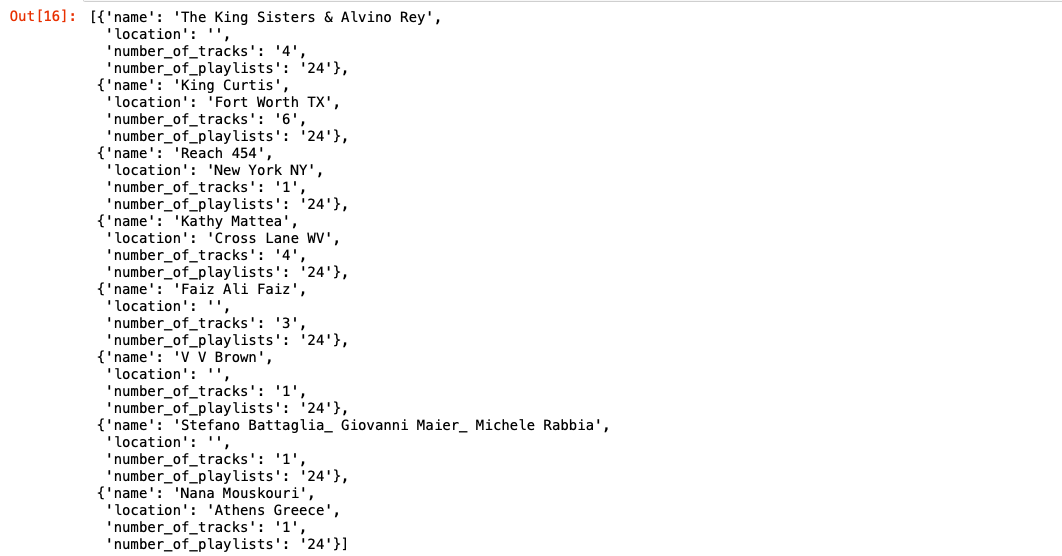

Now, we will store the artist information in a Pandas DataFrame and export it as a CSV file. We use the code below.

In [ ]:
# Create DataFrame from artist_data_list
df = pd.DataFrame(artist_data_list)

# Save the artist data as a CSV file
df.to_csv('artist_data.csv', index=False)

**Retrieve Recent Active Users**

In this section, we will create a helper function called get_users to retrieve the links for each user.

In [ ]:
def get_users(soup):
    users = []
    for item in soup.find_all(class_="col-sm-2 d-flex justify-content-center mobile-user-margin"):
        user = f'http://127.0.0.1:8080/' + item.find('a')['href']
        users.append(user)

    return users

get_users(soup)

*get_users* will give you urls of the recent active users like the image shown below.

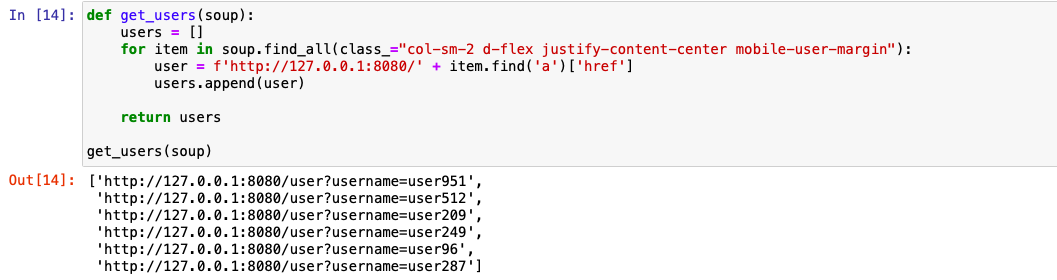

From the users, we want to grab the follwing information:
- Username
- Country
- Age

We are going to use the user-urls we have retrieved above. 

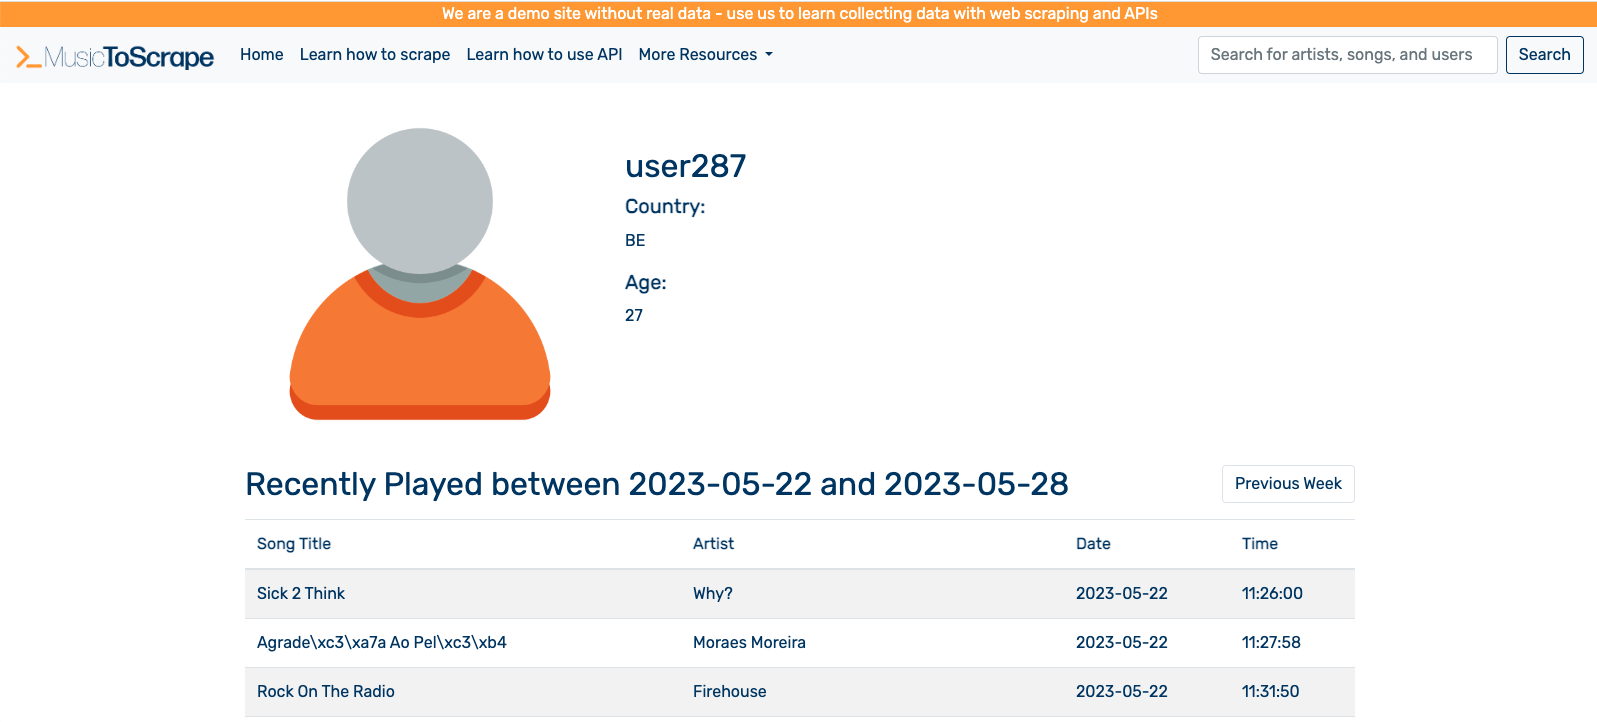

In [ ]:
import requests
from bs4 import BeautifulSoup

def get_user_info(url):
    # Make a GET request to the user page
    header = {'User-agent': 'Mozilla/5.0'}
    res = requests.get(url, headers=header)
    res.encoding = res.apparent_encoding
    soup = BeautifulSoup(res.text, 'html.parser')

    name = soup.find('h2').get_text()

    user_info_element = soup.find(class_="about_artist")
    if user_info_element:
        user_info = user_info_element.stripped_strings
        info_dict = {}
        for info in user_info:
            if info.endswith(":"):
                # If the info string ends with a colon, update the key
                key = info.strip(":").strip()
            else:
                # Otherwise, update the value
                value = info.strip()

                # Store the value in the dictionary
                info_dict[key] = value

        return {
            "name": name,
            "Country": info_dict.get("Country", ""),
            "Age": info_dict.get("Age", "")
        }
    else:
        print("User information not found")

def get_users(soup):
    users = []
    for item in soup.find_all(class_="col-sm-2 d-flex justify-content-center mobile-user-margin"):
        user = f'http://127.0.0.1:8080/' + item.find('a')['href']
        users.append(user)

    return users

user_data = {}  # Dictionary to store user data

for user_url in get_users(soup):
    user_info = get_user_info(user_url)
    if user_info:
        username = user_info['name']  # Assuming user_info has a 'name' key
        user_data[username] = user_info

user_data

*user_data* will give you the information for each user like the image shown below.

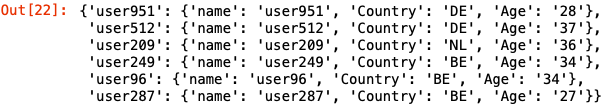

Now, we will store the user information in a Pandas DataFrame and export it as a CSV file. We use the code below.

In [ ]:
# Create DataFrame from user_data
df = pd.DataFrame(user_data)

# Save the user data as a CSV file
df.to_csv('user_data.csv', index=False)

**Search Engine Information**

In this section, we will define a helper function named scrape_search_info that allows us to retrieve the songs or artists that appear in the search results when performing a search using a specific keyword in the search engine located above on the right side.

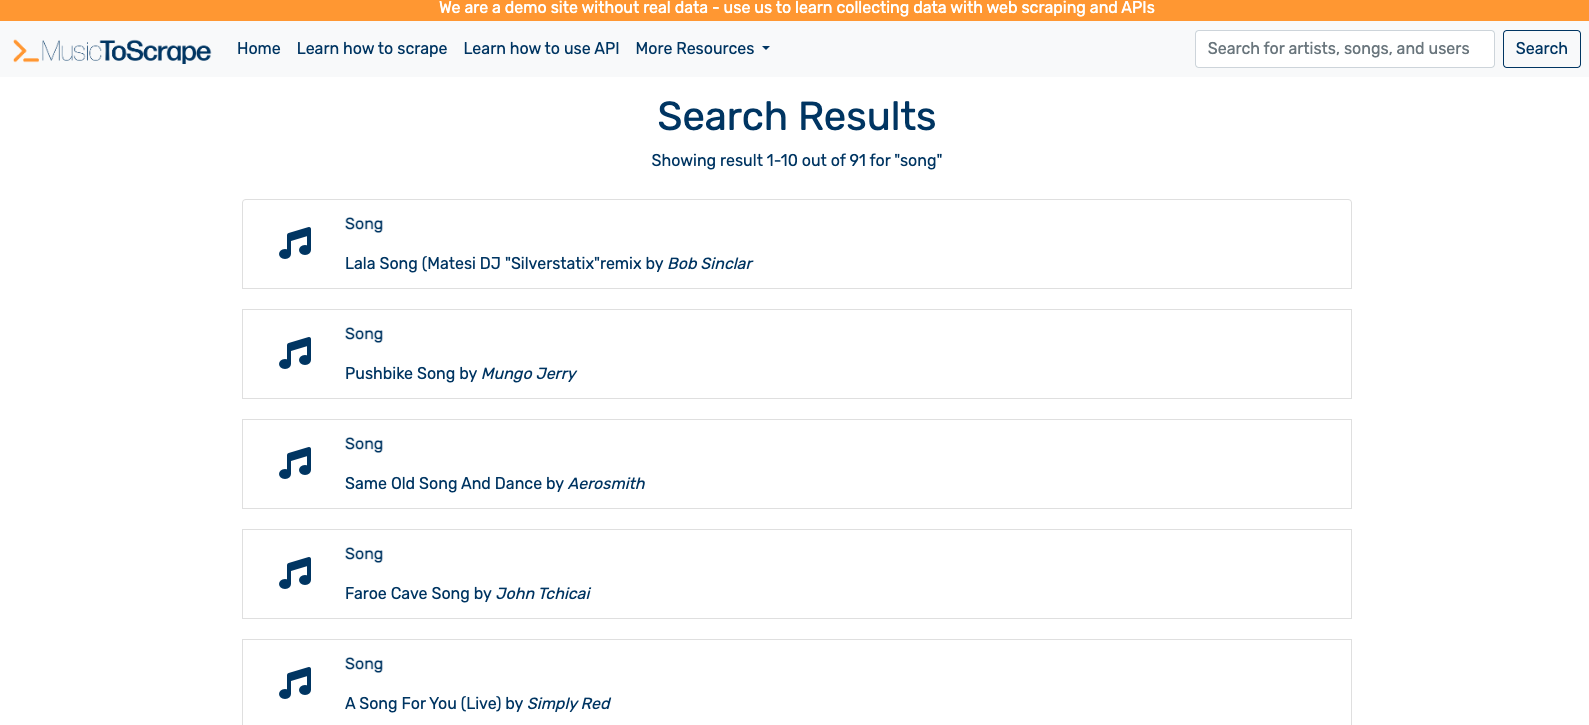

To begin with, let's determine the number of pages that appear when searching for a specific word. We will need to retrieve this number and incorporate it into our function later on.

Please note that in this example, we have used the word 'song' as an illustration, but you can replace this word with any other term within the URL.

In [ ]:
counter = 1
page_urls = []
while counter <= 10:
    page_urls.append(f'http://127.0.0.1:8080/search?query=song&page={counter}')
    counter+=1
page_urls

*page_urls* gives the urls for the different pages with results after using the search engine as shown on the image below.

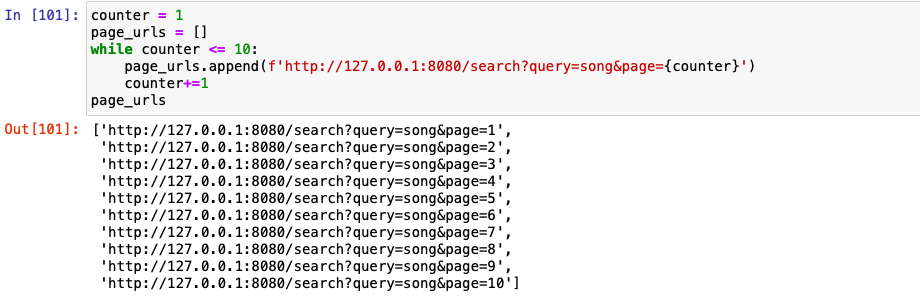

In order to gather information about the songs and artists that appear for the given keyword across all pages, we will utilize a scraper that iterates through each page, extracting the relevant data. This scraper enables us to retrieve all the necessary information for further analysis.

In [ ]:
def scrape_search_info():
    search_info_list = []

    counter = 1
    while counter <= 10:
        url = f'http://127.0.0.1:8080/search?query=song&page={counter}'
        header = {'User-agent': 'Mozilla/5.0'}
        res = requests.get(url, headers=header)
        res.encoding = res.apparent_encoding
        soup = BeautifulSoup(res.text, 'html.parser')

        search_elements = soup.find_all(class_="col-lg-11 center-text")
        for search_element in search_elements:
            search_song = search_element.get_text().strip()
            lines = search_song.split("\n")
            song_title = lines[1].strip()
            type_info = lines[0].strip()

            song_info = {
                "Type": type_info,
                "Name": song_title
            }
            search_info_list.append(song_info)

        counter += 1

    return search_info_list

search_engine = scrape_search_info()
search_engine

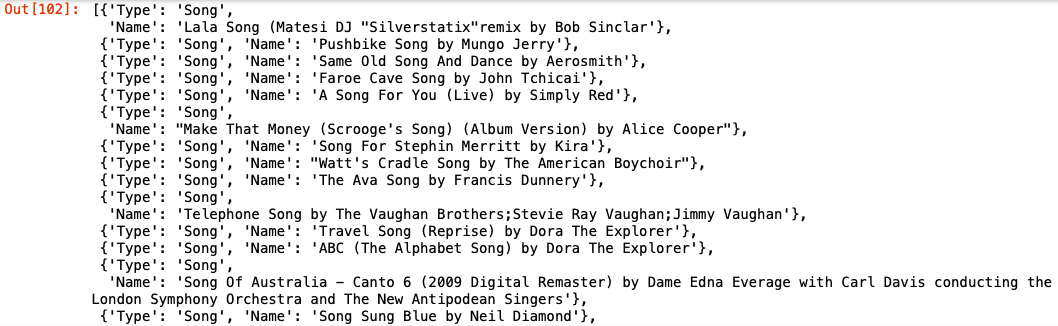

Now, we will store the search engine information in a Pandas DataFrame and export it as a CSV file. We use the code below.

In [ ]:
# Create DataFrame from search_engine
df = pd.DataFrame(search_engine)

# Save the search engine data as a CSV file
df.to_csv('search_engine.csv', index=False)